# Title: Linear Regression model

## Description:
In this file we are going to create a linear regression model to predict the total annual benefit of the trees.

In detail, we are going to:
1. Import the data
2. Clean the data
3. Create the model
4. Train the model
5. Evaluate the model

In [100]:
%matplotlib inline
import math
import matplotlib
import pandas
import glob
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [101]:
data = pd.read_csv('data_trees_modified.csv', sep=';')

export_eco = pd.read_csv('../data/reports/export_eco.csv', sep=';')

/var/folders/j8/fjrnp8w15sbf5q2fdgnpb0br0000gn/T/ipykernel_17639/4200321720.py:3: DtypeWarning: Columns (24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  export_eco = pd.read_csv('../data/reports/export_eco.csv', sep=';')


In [102]:
data.columns

Index(['Tree ID', 'Name', 'DBH (cm)', 'Replacement Value (eur)',
       'Carbon Storage (kg)', 'Carbon Storage (eur)',
       'Gross Carbon Sequestration (kg/yr)',
       'Gross Carbon Sequestration (eur/yr)', 'Avoided Runoff (l/yr)',
       'Avoided Runoff (eur/yr)', 'Carbon Avoided (kg/yr)',
       'Carbon Avoided (eur/yr)', 'Pollution Removal (g/yr)',
       'Pollution Removal (eur/yr)', 'Energy Savings (eur/yr)',
       'Total Annual Benefits (eur/yr)', 'Height (m)', 'Latitude',
       'Longitude'],
      dtype='object')

In [103]:
data.head(1)

,Tree ID,Name,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (l/yr),Avoided Runoff (eur/yr),Carbon Avoided (kg/yr),Carbon Avoided (eur/yr),Pollution Removal (g/yr),Pollution Removal (eur/yr),Energy Savings (eur/yr),Total Annual Benefits (eur/yr),Height (m),Latitude,Longitude
0,2,Common fig,23.622,1031.67,132.086098,21.22,10.387265,1.67,48.831789,0.09,0.0,NaN,0.031184,0.09,NaN,1.85,3.0,44.499234,11.30462


In [104]:
COLUMNS = ['Replacement Value (eur)', 'DBH (cm)', 'Height (m)', 'Gross Carbon Sequestration (kg/yr)', 'Avoided Runoff (l/yr)', 'Total Annual Benefits (eur/yr)', ]

#trees = pandas.read_csv('data/training_trees.csv', sep=';')
# create a subsample of data, the first 10000 rows

#trees = data.iloc[:50000, :]
trees = data

In [105]:
# Calculate the R-squared score between the 'Height (m)' and 'DBH (cm)' columns of the 'trees' DataFrame.
metrics.r2_score(trees['Height (m)'], trees['Total Annual Benefits (eur/yr)'])

-0.7781585083471076

In [106]:
# split the data into training and validation sets
# we are going to use the 'DBH (cm)' and 'Carbon Storage (kg)' columns as features
# and the 'Total Annual Benefits (eur/yr)' column as the target
x_train, x_validation, y_train, y_validation = train_test_split(
    trees[['DBH (cm)', 'Carbon Storage (kg)']],
    trees['Total Annual Benefits (eur/yr)'],
    test_size=0.25,
)

regression = LinearRegression()
regression.fit(
    x_train,
    y_train,
)

print(mean_absolute_percentage_error(y_train, regression.predict(x_train)))
print(r2_score(y_train, regression.predict(x_train)))

47.266479875484706
0.6512900686621135


1.0242228578243429
0.7482425198106415


/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


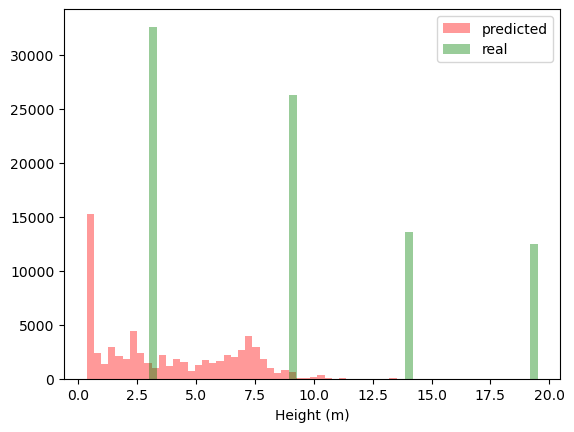

In [107]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['DBH (cm)', 'Height (m)', 'Avoided Runoff (l/yr)']],
        trees_df['Total Annual Benefits (eur/yr)'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    return reg, x_train

reg_o3, x_train = get_reg(trees)

a1, a2, a3, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.coef_[2], reg_o3.intercept_

fn = a1 * trees['DBH (cm)'] + a2 * trees['Latitude'] + a3 * trees['Longitude'] + b

sns.distplot(reg_o3.predict(x_train), kde=False, bins=50, color='r', label='predicted')
sns.distplot(trees['Height (m)'], kde=False, bins=50, color='g', label='real')
plt.legend()


MErr: 4.787437184000961
R2:   0.002823162023087855


/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


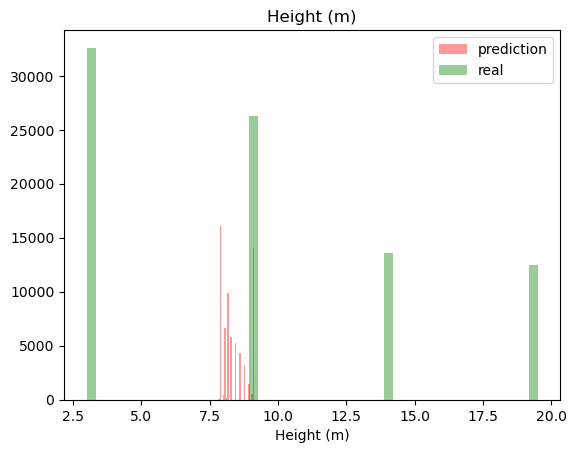

MErr: 6.389010509441437
R2:   0.2631364865219096


/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


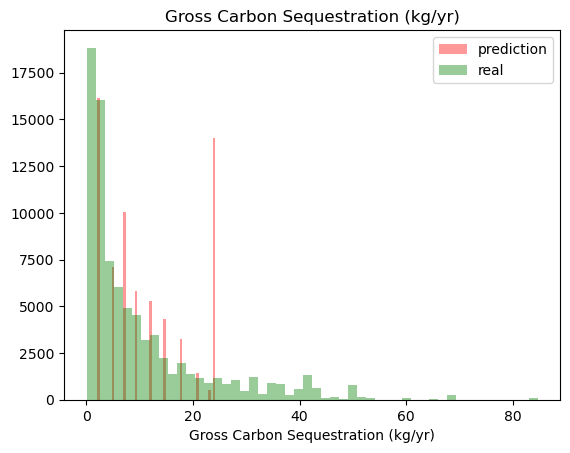

MErr: 155.91567347238592
R2:   0.7620908008537922


/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


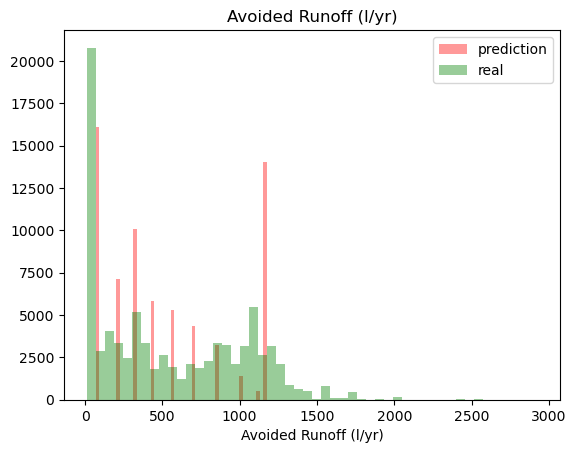

MErr: 1.2724086725702382
R2:   0.6134577612698082


/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


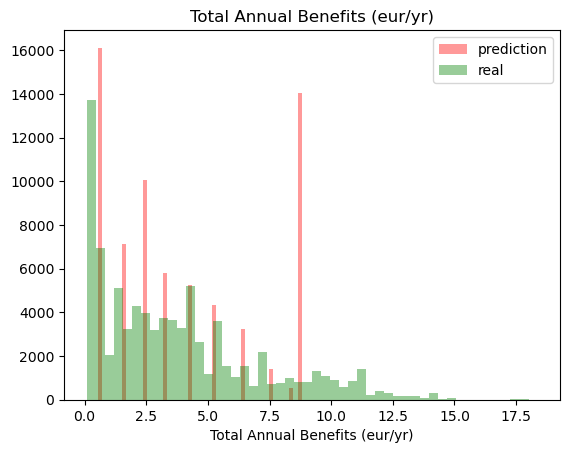

In [108]:
def get_reg(trees_df, factor):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['DBH (cm)', 'Latitude']],
        trees_df[factor],
        test_size=0.2,
        random_state=52,
    )

    reg = HuberRegressor()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(f'MErr: {mean_abs_err}')
    print(f'R2:   {r2_score(y_validation, reg.predict(x_validation))}')
    
    sns.distplot(reg.predict(x_train), kde=False, bins=50, color='r', label='prediction')
    sns.distplot(trees_df[factor], kde=False, bins=50, color='g', label='real')
    plt.title(factor) 
    plt.legend()
    plt.show()
    
    return reg

factors = ['Height (m)', 'Gross Carbon Sequestration (kg/yr)', 'Avoided Runoff (l/yr)', 'Total Annual Benefits (eur/yr)', ]
models = {}

for factor in factors:

    reg = get_reg(trees, factor)

    models[factor] = reg
    


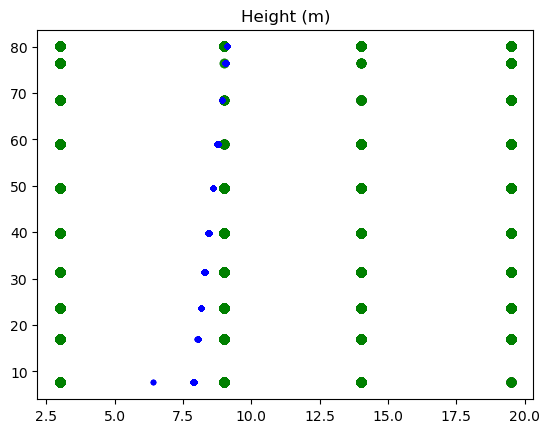

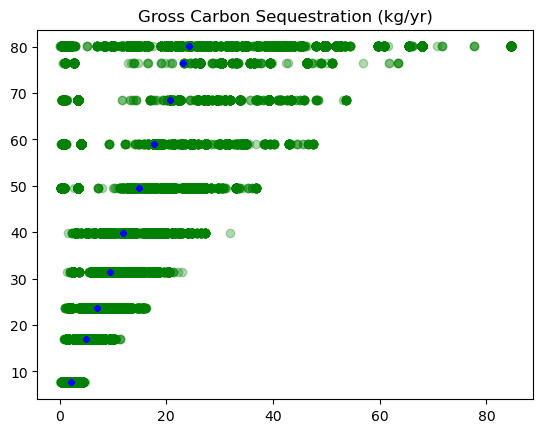

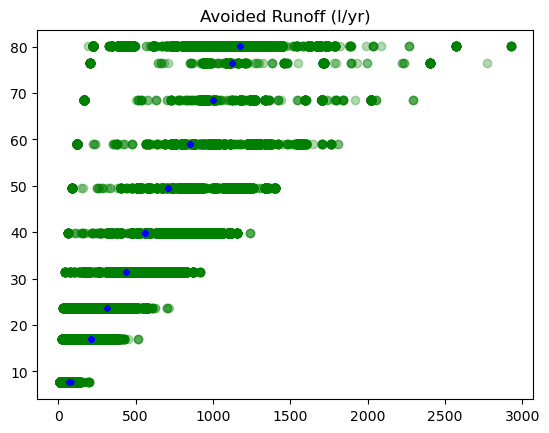

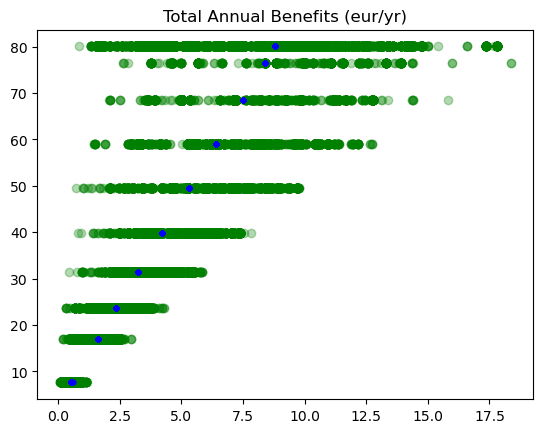

In [109]:
def plot_regression(reg, trees_df, factor):
    a1, a2, b = reg.coef_[0], reg.coef_[1], reg.intercept_

    fn = a1 * trees_df['DBH (cm)'] + a2 * trees_df['Latitude'] + b
    plt.plot(fn, trees_df['DBH (cm)'], 'b.')
    plt.scatter(trees_df[factor], trees_df['DBH (cm)'], c='g', alpha=0.3)
    plt.title(factor)
    plt.show()
    
    
for factor, reg in models.items():
    plot_regression(reg, trees, factor)

In [110]:
data['DBH (cm)'] = data['DBH (cm)'] * math.pi
data['Latitude'] = np.sqrt(data['DBH (cm)'])

<AxesSubplot:xlabel='Gross Carbon Sequestration (kg/yr)', ylabel='Density'>

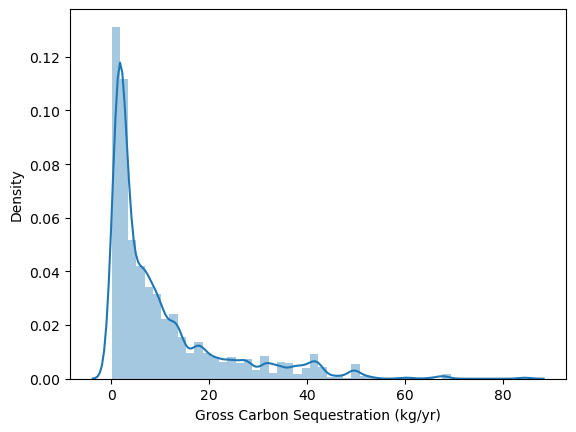

In [111]:
sns.distplot(data['Gross Carbon Sequestration (kg/yr)'], bins=50)

In [112]:
data.describe()

,Tree ID,DBH (cm),Replacement Value (eur),Carbon Storage (kg),Carbon Storage (eur),Gross Carbon Sequestration (kg/yr),Gross Carbon Sequestration (eur/yr),Avoided Runoff (l/yr),Avoided Runoff (eur/yr),Carbon Avoided (kg/yr),Carbon Avoided (eur/yr),Pollution Removal (g/yr),Pollution Removal (eur/yr),Energy Savings (eur/yr),Total Annual Benefits (eur/yr),Height (m),Latitude,Longitude
count,84943.000000,84943.000000,84943.000000,84943.000000,84943.000000,84943.000000,84943.000000,84943.000000,84943.000000,84943.0,0.0,84943.000000,84943.000000,0.0,84943.000000,84943.000000,84943.000000,84943.000000
mean,66556.023628,117.175272,2894.997547,663.524812,106.606369,10.265916,1.649501,554.322819,1.054442,0.0,NaN,0.370129,1.038717,NaN,3.742811,9.037072,10.052942,11.347481
std,37964.216181,84.504831,3166.994539,992.944436,159.533443,12.337153,1.981960,469.476216,0.893213,0.0,NaN,0.313577,0.879837,NaN,3.282642,5.828789,4.014203,0.066585
min,2.000000,23.938936,72.590000,1.496855,0.240000,0.090718,0.010000,10.220607,0.020000,0.0,NaN,0.005670,0.020000,NaN,0.080000,3.000000,4.892743,3.457371
25%,32976.500000,53.463624,620.210000,35.108049,5.640000,1.995806,0.320000,70.030085,0.130000,0.0,NaN,0.048194,0.130000,NaN,0.910000,3.000000,7.311882,11.314873
50%,66888.000000,98.947602,1209.090000,155.037872,24.910000,5.352390,0.860000,440.243183,0.840000,0.0,NaN,0.294835,0.820000,NaN,2.990000,9.000000,9.947241,11.354266
75%,101333.500000,185.127772,4699.950000,877.837314,141.040000,13.335616,2.140000,970.200583,1.850000,0.0,NaN,0.649204,1.820000,NaN,5.310000,14.000000,13.606167,11.380442
max,129582.000000,251.358828,11010.880000,7024.331442,1128.580000,84.594977,13.590000,2926.879012,5.570000,0.0,NaN,1.953281,5.490000,NaN,18.370000,19.500000,15.854300,11.433451
